# How did average assignment GPA, on assignments due per day, change over the semester? 

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime
import matplotlib.ticker as ticker
import sys
sys.path.insert(0, '/home/jenny/remote_learning_code_Spring_2017-2020')
from utils import parse_args


sys.argv = ['-f']
args = parse_args()

term_20 = args.semester_2020_Spring
start_date_20 = args.start_date_2020_Spring
remote_date_20 = args.remote_date_2020_Spring
end_date_20 = args.end_date_2020_Spring

term_19 = args.semester_2019_Spring
start_date_19 = args.start_date_2019_Spring
cutoff_date_19 = args.cutoff_date_2019_Spring
end_date_19 = args.end_date_2019_Spring

term_18 = args.semester_2018_Spring
start_date_18 = args.start_date_2018_Spring
cutoff_date_18 = args.cutoff_date_2018_Spring
end_date_18 = args.end_date_2018_Spring

term_17 = args.semester_2017_Spring
start_date_17 = args.start_date_2017_Spring
cutoff_date_17 = args.cutoff_date_2017_Spring
end_date_17 = args.end_date_2017_Spring


In [2]:
# load submission
submission_000 = pd.read_csv(args.submissions, sep='\t', header=0)
#print(submission['score'].drop_duplicates())
#print(submission['published_score'].drop_duplicates())
submission_000['submitted_at'] = pd.to_datetime(submission_000['submitted_at'], format='%Y-%m-%d %H:%M:%S.%f')

# load assignments
assignments_000 = pd.read_csv(args.assignments, sep='\t', header=0)
assignments_000 = assignments_000.loc[:, ['assignment_id', 'points_possible', 'term_name']]  # no duplicate exists


In [3]:
def assignment_GPA(submission, assignments, term, start_date, end_date):        
    submission = submission.loc[(submission['created_at'].notnull())&(submission['created_at']>=start_date)&(submission['created_at']<=end_date), ['user_id', 'assignment_id', 'submitted_at', 'published_score']] # no duplicate exists
    submission = submission.loc[(submission['submitted_at'].notnull())&(submission['submitted_at']>=start_date)&(submission['submitted_at']<=end_date)&(submission['published_score'].notnull())&(submission['published_score']>0)]
    submission['submitted_at'] = submission['submitted_at'].apply(lambda x: x.date())
    assignments = assignments.loc[assignments['term_name']==term]
    
    # merge assignments and submission to match scores with total points
    submission = pd.merge(submission, assignments, on='assignment_id', how='inner')
    submission = submission.loc[(submission['points_possible'].notnull())&(submission['points_possible']>0)&(submission['published_score']<=submission['points_possible'])]
    submission['score'] = submission['published_score'] / submission['points_possible']
    #print(submission)
    group = submission.groupby('submitted_at')
    time = []
    gpa = []
    #num = []
    for i in group.groups.keys():
        each = group.get_group(i)
        average_gpa = np.mean(each['score'].tolist())
        #num.append(len(each))
        time.append(i)
        gpa.append(average_gpa)
    time_gpa = pd.Series(gpa, index=time, name='gpa')
    return time_gpa

time_20 = assignment_GPA(submission_000, assignments_000, term_20, start_date_20, end_date_20)
time_19 = assignment_GPA(submission_000, assignments_000, term_19, start_date_19, end_date_19)
time_18 = assignment_GPA(submission_000, assignments_000, term_18, start_date_18, end_date_18)
time_17 = assignment_GPA(submission_000, assignments_000, term_17, start_date_17, end_date_17)

In [4]:
time_20 = time_20.reset_index()
time_20.set_index('index', inplace=True)
time_19 = time_19.reset_index()
time_19['index'] = time_19['index'].apply(lambda x: x.replace(year=2020))
time_19.set_index('index', inplace=True)
time_18 = time_18.reset_index()
time_18['index'] = time_18['index'].apply(lambda x: x.replace(year=2020))
time_18.set_index('index', inplace=True)
time_17 = time_17.reset_index()
time_17['index'] = time_17['index'].apply(lambda x: x.replace(year=2020))
time_17.set_index('index', inplace=True)

                 gpa
index               
2020-01-14  0.956151
2020-01-15  0.883080
2020-01-16  0.790485
2020-01-17  0.794990
2020-01-18  0.954894
...              ...
2020-05-11  0.861557
2020-05-12  0.830771
2020-05-13  0.831833
2020-05-14  0.824226
2020-05-15  0.786932

[123 rows x 1 columns]


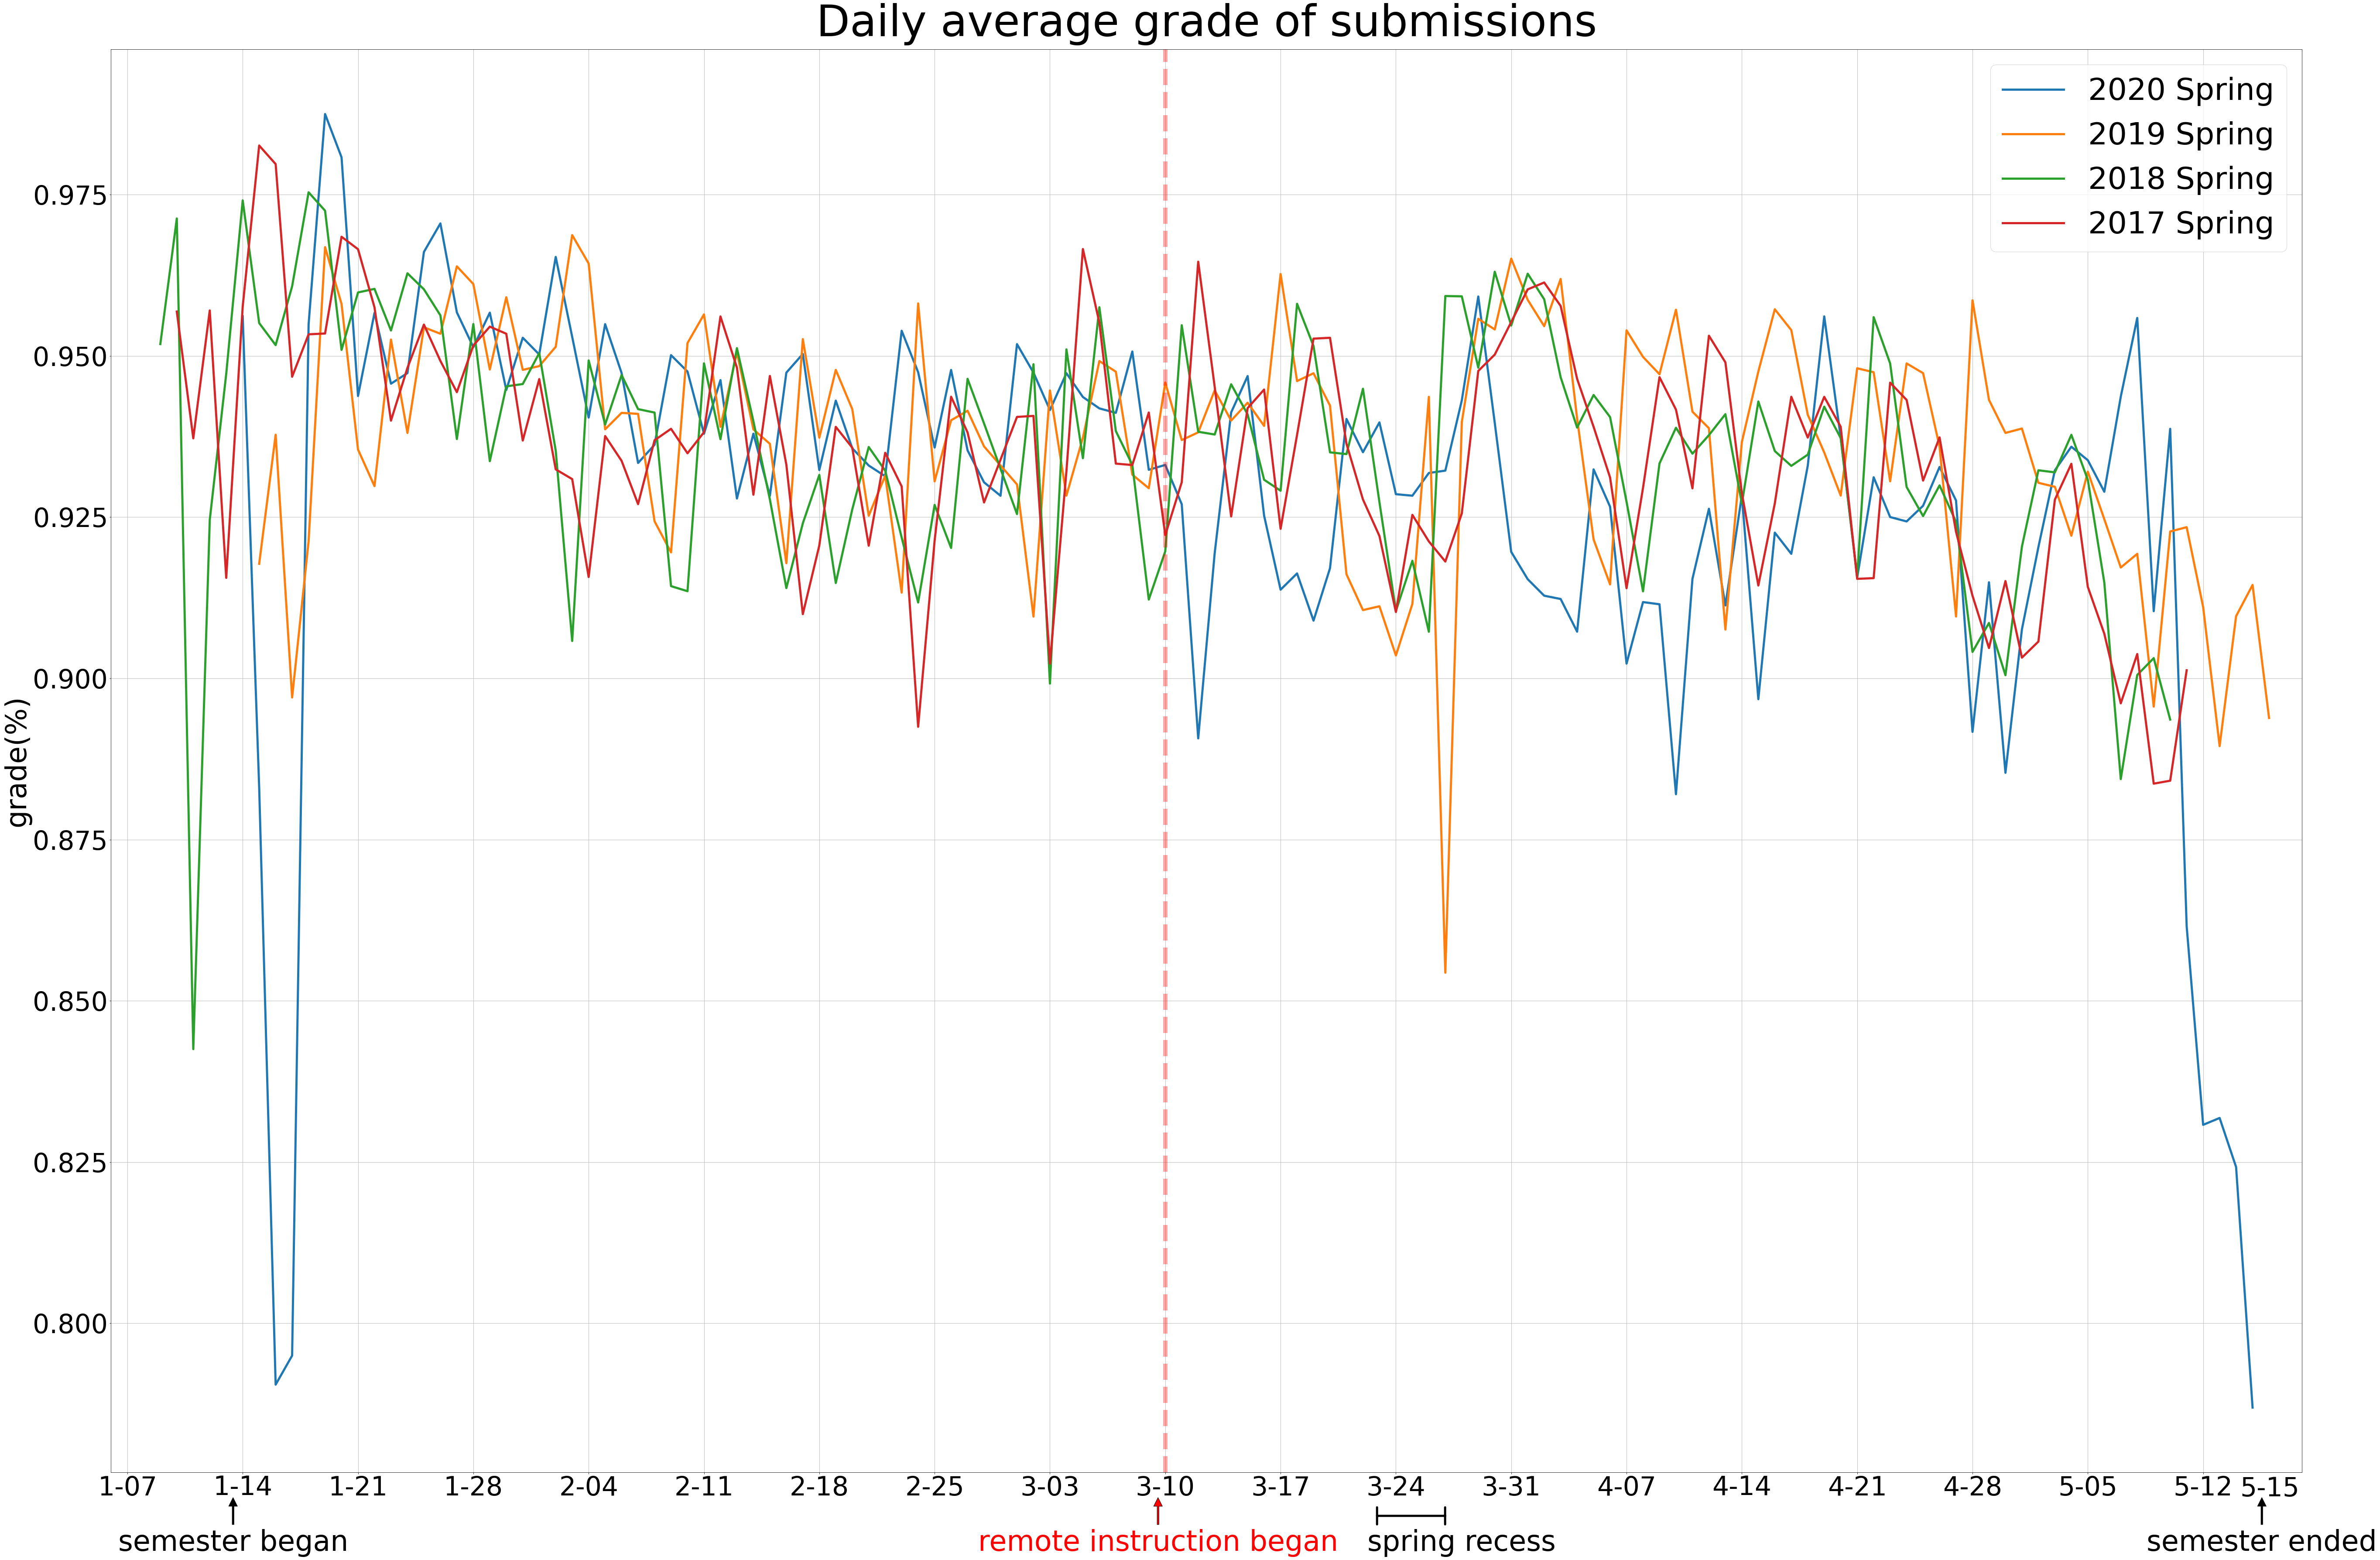

In [6]:
# set x-axis ticks
fig,ax = plt.subplots()
fig.patch.set_facecolor('white')
myFmt = mdates.DateFormatter('%-m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_xlim([datetime.date(2020, 1, 6), datetime.date(2020, 5, 18)])

print(time_20)
plt.plot(time_20, linewidth=5.0, label='2020 Spring')
plt.plot(time_19, linewidth=5.0, label='2019 Spring')
plt.plot(time_18, linewidth=5.0, label='2018 Spring')
plt.plot(time_17, linewidth=5.0, label='2017 Spring')
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.title('Daily average grade of submissions', fontsize=100, pad=30)
#plt.xlabel('date', fontsize=65, labelpad=120)
plt.ylabel('grade(%)', fontsize=65)

# annotation on x-axis

ax.annotate('semester began', fontsize=65, xy=(280, -50), xytext=(280, -180), xycoords='axes points', ha='center',
           arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('remote instruction began', color='red', fontsize=65, xy=(2400, -50), xytext=(2400, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='red', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('semester ended', fontsize=65, xy=(4930, -50), xytext=(4930, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('5-15', fontsize=60, xy=(4880, -55), xycoords='axes points')

ax.annotate('', fontsize=65, xy=(2900, -100), xytext=(3060, -100),
            xycoords='axes points',
            arrowprops=dict(arrowstyle='|-|,widthA=0.3,widthB=0.3', linewidth=5))
ax.annotate('spring recess', fontsize=65, xy=(2880, -180), xycoords='axes points')
plt.axvline(x=datetime.date(2020, 3, 10), color = 'r', linewidth=10, alpha=0.35, linestyle='--')
plt.legend(prop={'size': 70})
plt.show()

                 gpa
index               
2020-01-14  0.956151
2020-01-15  0.883080
2020-01-16  0.790485
2020-01-17  0.794990
2020-01-18  0.954894
...              ...
2020-05-11  0.861557
2020-05-12  0.830771
2020-05-13  0.831833
2020-05-14  0.824226
2020-05-15  0.786932

[123 rows x 1 columns]


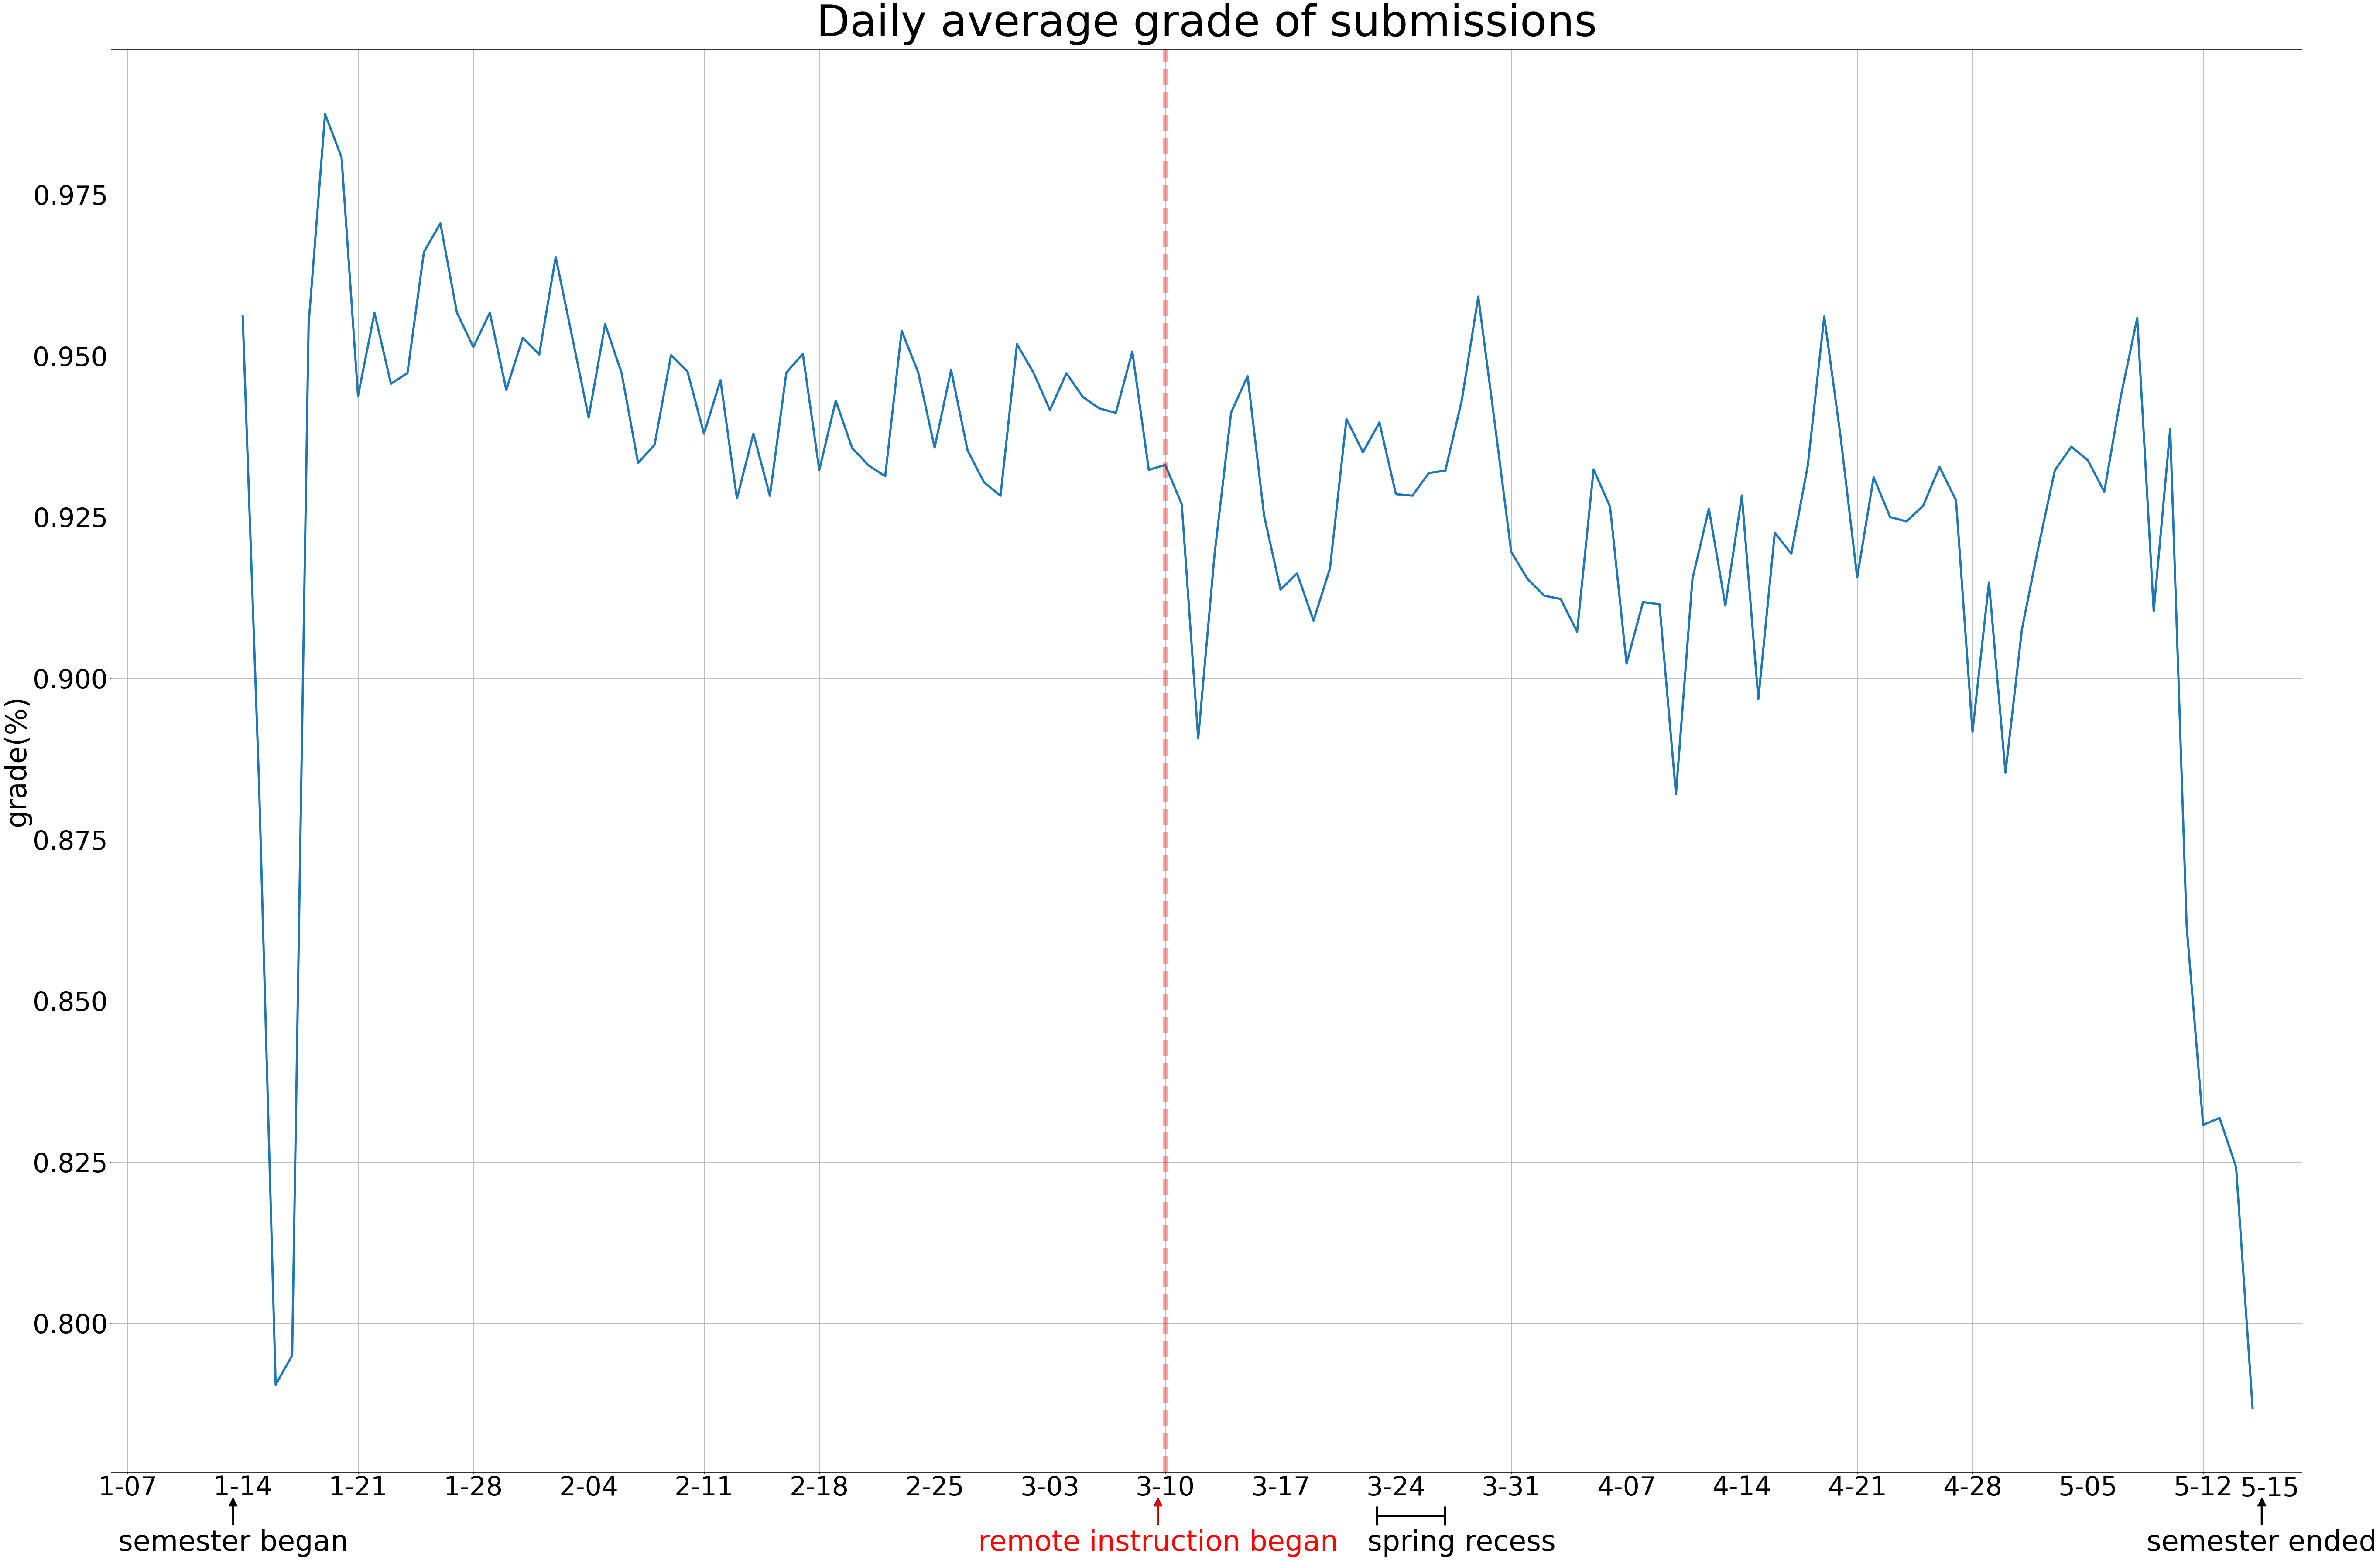

In [7]:
# set x-axis ticks
fig,ax = plt.subplots()
fig.patch.set_facecolor('white')
myFmt = mdates.DateFormatter('%-m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_xlim([datetime.date(2020, 1, 6), datetime.date(2020, 5, 18)])

print(time_20)
plt.plot(time_20, linewidth=5.0, label='2020 Spring')
plt.plot(time_19, linewidth=5.0, label='2019 Spring', alpha=0)
plt.plot(time_18, linewidth=5.0, label='2018 Spring', alpha=0)
plt.plot(time_17, linewidth=5.0, label='2017 Spring', alpha=0)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.title('Daily average grade of submissions', fontsize=100, pad=30)
#plt.xlabel('date', fontsize=65, labelpad=120)
plt.ylabel('grade(%)', fontsize=65)

# annotation on x-axis

ax.annotate('semester began', fontsize=65, xy=(280, -50), xytext=(280, -180), xycoords='axes points', ha='center',
           arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('remote instruction began', color='red', fontsize=65, xy=(2400, -50), xytext=(2400, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='red', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('semester ended', fontsize=65, xy=(4930, -50), xytext=(4930, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('5-15', fontsize=60, xy=(4880, -55), xycoords='axes points')

ax.annotate('', fontsize=65, xy=(2900, -100), xytext=(3060, -100),
            xycoords='axes points',
            arrowprops=dict(arrowstyle='|-|,widthA=0.3,widthB=0.3', linewidth=5))
ax.annotate('spring recess', fontsize=65, xy=(2880, -180), xycoords='axes points')
plt.axvline(x=datetime.date(2020, 3, 10), color = 'r', linewidth=10, alpha=0.35, linestyle='--')
#plt.legend(prop={'size': 70})
plt.show()